In [66]:
import numpy as np

In [67]:
import pickle

In [68]:
with open('/content/train_qa.txt','rb') as file:
  train_data = pickle.load(file)

In [69]:
with open('/content/test_qa.txt','rb') as f:
  test_data = pickle.load(f)

In [70]:
type(test_data)

list

In [71]:
type(train_data)

list

In [72]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [73]:
type(train_data[1])

tuple

In [74]:
all_data = train_data + test_data

In [75]:
type(all_data)

list

In [76]:
len(all_data)

11000

In [77]:
len(train_data)

10000

In [78]:
len(test_data)

1000

In [79]:
vocab = set()

for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [80]:
vocab.add('yes')
vocab.add('no')

In [ ]:
#vocab

In [81]:
vocab_len = len(vocab) + 1

In [82]:
vocab_len

38

In [ ]:
#all_data[0]

In [83]:
lens = []
for i in range(1,11000,1):
  lens.append(len(all_data[i][0]))
max_story_len = max(lens)
max_story_len

156

In [84]:
lens2 = []
for i in range(1,11000,1):
  lens2.append(len(all_data[i][1]))
max_question_len = max(lens2)
max_question_len

6

In [ ]:
#all_story_lens = [len(data[0][0]) for data in all_data]

In [ ]:
#max_story_len = max(all_story_lens)

In [ ]:
#max_question_len = max([len(data[][1]) for data in all_data])

In [ ]:
#max_question_len

In [85]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [86]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [87]:
tokenizer.word_index

{'.': 8,
 '?': 36,
 'apple': 4,
 'back': 3,
 'bathroom': 2,
 'bedroom': 13,
 'daniel': 17,
 'discarded': 37,
 'down': 23,
 'dropped': 29,
 'football': 30,
 'garden': 15,
 'got': 28,
 'grabbed': 20,
 'hallway': 12,
 'in': 16,
 'is': 22,
 'john': 19,
 'journeyed': 24,
 'kitchen': 35,
 'left': 5,
 'mary': 26,
 'milk': 31,
 'moved': 27,
 'no': 1,
 'office': 11,
 'picked': 10,
 'put': 33,
 'sandra': 21,
 'the': 9,
 'there': 34,
 'to': 32,
 'took': 6,
 'travelled': 25,
 'up': 18,
 'went': 7,
 'yes': 14}

In [88]:
train_story_text = []
train_question_text = []
train_answers = []

In [89]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [90]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [91]:
train_answers

['no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',


In [92]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [93]:
len(train_story_seq)

10000

In [94]:
type(train_story_seq)


list

In [95]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len = max_story_len,max_question_len= max_question_len):
  X = []
  Xq = []
  Y = []
  for story,query,answer in data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]
    y = np.zeros(len(word_index)+1)
    y[word_index[answer]] = 1
    X.append(x)
    Xq.append(xq)
    Y.append(y)
  return (pad_sequences(X,maxlen = max_story_len),pad_sequences(Xq,maxlen = max_question_len),np.array(Y))

In [96]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [97]:
inputs_test

array([[ 0,  0,  0, ...,  9, 13,  8],
       [ 0,  0,  0, ...,  9, 15,  8],
       [ 0,  0,  0, ...,  9, 15,  8],
       ...,
       [ 0,  0,  0, ...,  9,  4,  8],
       [ 0,  0,  0, ...,  9, 15,  8],
       [ 0,  0,  0, ...,  4, 34,  8]], dtype=int32)

In [98]:
answers_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
tokenizer.word_index['yes']

14

In [100]:
tokenizer.word_index['no']

1

In [101]:
sum(answers_test)

array([  0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [102]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [103]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [104]:
vocab_size = len(vocab) +1

In [105]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size,output_dim = 64))
input_encoder_m.add(Dropout(0.3))

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size,output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size,output_dim = 64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [106]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [107]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))


In [108]:
match = Activation('softmax')(match)

In [109]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [110]:
answer = concatenate([response,question_encoded])

In [111]:
answer

<tf.Tensor 'concatenate_2/concat:0' shape=(None, 6, 220) dtype=float32>

In [112]:
answer = LSTM(32)(answer)

In [113]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [114]:
answer = Activation('softmax')(answer)

In [115]:
model = Model([input_sequence,question],answer)

In [116]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [117]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       multiple             2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

In [118]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=50,validation_data =([inputs_test,queries_test],answers_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 1000 samples
Epoch 1/50
10000/10000 [==============================] - 5s 541us/step - loss: 0.9057 - accuracy: 0.5023 - val_loss: 0.6947 - val_accuracy: 0.4970
Epoch 2/50
10000/10000 [==============================] - 5s 513us/step - loss: 0.7012 - accuracy: 0.5041 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 3/50
10000/10000 [==============================] - 5s 484us/step - loss: 0.6961 - accuracy: 0.4974 - val_loss: 0.6993 - val_accuracy: 0.4970
Epoch 4/50
10000/10000 [==============================] - 5s 474us/step - loss: 0.6948 - accuracy: 0.5052 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 5/50
10000/10000 [==============================] - 5s 476us/step - loss: 0.6946 - accuracy: 0.4983 - val_loss: 0.6946 - val_accuracy: 0.4970
Epoch 6/50
10000/10000 [==============================] - 5s 479us/step - loss: 0.6949 - accuracy: 0.4916 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 7/50
10000/10000 [==============================] - 5s 48

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


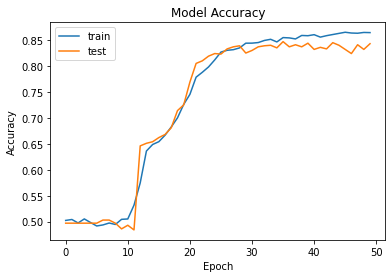

In [119]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [120]:
model.save('MymodelFinal11.h5')

In [121]:
pred_results = model.predict(([inputs_test,queries_test]))

In [122]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [123]:
pred_results.shape

(1000, 38)

In [124]:
val_max = np.argmax(pred_results[0])

In [125]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [126]:
k

'no'

In [127]:
pred_results[0][val_max]

0.99832827

In [128]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [129]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [130]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [131]:
my_question = "Is the football in the garden ?"

In [132]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [133]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [134]:
my_story , my_ques, my_ans = vectorize_stories(mydata)

In [135]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [136]:
pred_results = model.predict(([my_story,my_ques]))

In [137]:
val_max = np.argmax(pred_results[0])

In [138]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [139]:
k

'yes'

In [140]:
pred_results[0][val_max]

0.9905862